# Метапрограммирование

https://habr.com/ru/post/431438/

In [1]:
cats = 4
s1 = "How many cats ";
s2 = "is too many cats?";
s3 = s1*s2

"How many cats is too many cats?"

In [10]:
s1[3]

'w': ASCII/Unicode U+0077 (category Ll: Letter, lowercase)

In [18]:
s1[13:-1:5]

"stac ynam"

In [13]:
s2[end]

'?': ASCII/Unicode U+003f (category Po: Punctuation, other)

In [14]:
s1^3

"How many cats How many cats How many cats "

In [15]:
s4 = string(s3, " - I don't know, but ", cats, " is too few.")

"How many cats is too many cats? - I don't know, but 4 is too few."

In [36]:
"$s3 - I don't know, but $cats is too few."

"How many cats is too many cats? - I don't know, but 4 is too few."

In [5]:
findfirst( isequal('o'), s4 )

4

In [6]:
findlast( isequal('o'), s4 )

26

In [9]:
findnext( isequal('o'), s4, 7 )

11

In [27]:
function *(a::String, b::Number) 
    if b == 0
        0
    else
        if b == 1
            a
        else
            "$b" * "*(" * a * ")"
        end
    end
end

* (generic function with 344 methods)

In [2]:
import Base: *, -, +
+(a::String, b::String) = a * "+" * b
*(a::String, b::String) = a * "*(" * b * ")"
*(a::String, b::Number) = (b==0) ? 0 : (b==1) ? a : "$b" * "*(" * a * ")"
*(b::Number, a::String) = (b==0) ? 0 : (b==1) ? a : "$b" * "*(" * a * ")"
+(a::String, b::Number) = (b==0) ? a : a * "+" * "$b"
+(b::Number, a::String) = (b==0) ? a : a * "+" * "$b"
-(b::Number, a::String) = (b==0) ? "-" *  a : "$b" * "-" * a
-(a::String, b::Number) = (b==0) ? a : a * "-" * "$b"

- (generic function with 198 methods)

https://github.com/JuliaPy/SymPy.jl  
https://github.com/jlapeyre/Symata.jl  
https://github.com/symengine/SymEngine.jl  
https://github.com/cdsousa/LinearExpressions.jl

In [33]:
ε = zeros(Int, 3,3,3)
ε[1,2,3] = ε[2,3,1] = ε[3,1,2] = 1
ε[3,2,1] = ε[1,3,2] = ε[2,1,3] = -1
ε

3×3×3 Array{Int64,3}:
[:, :, 1] =
 0   0  0
 0   0  1
 0  -1  0

[:, :, 2] =
 0  0  -1
 0  0   0
 1  0   0

[:, :, 3] =
  0  1  0
 -1  0  0
  0  0  0

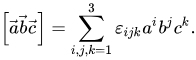

In [1]:
minmax(x, y) = (y < x) ? (y, x) : (x, y)
range((min, max)) = max - min

range(minmax(10, 2))

8

In [34]:
detrmnt(arr) = sum( ε[i,j,k]*arr[1,i]*arr[2,j]*arr[3,k] for i in 1:3, j in 1:3, k in 1:3 )

detrmnt (generic function with 1 method)

In [35]:
detrmnt(["a" 2 "b"; 1 0 1; "c" 2 "d"])

"2*(c)+2*(b)+2*(-1*(a))+-2*(d)"

In [14]:
function minor(a, b)
    a == 1 ? i = 2 : i = 1
    print("A_$a$b = ")
    for j = 1:3
        if(j == b) 
            continue
        end
        print("A_$i$j*A_$(xor(a,i))$(xor(b,j)) ")
    end
    print('\n')
end

for i = 1:3, j = 1:3 
    minor(i, j)
end

A_11 = A_22*A_33 A_23*A_32 
A_12 = A_21*A_33 A_23*A_31 
A_13 = A_21*A_32 A_22*A_31 
A_21 = A_12*A_33 A_13*A_32 
A_22 = A_11*A_33 A_13*A_31 
A_23 = A_11*A_32 A_12*A_31 
A_31 = A_12*A_23 A_13*A_22 
A_32 = A_11*A_23 A_13*A_21 
A_33 = A_11*A_22 A_12*A_21 


In [36]:
function cofactor(Arr, Brr)
    for a = 1:3, b = 1:3 
        a == 1 ? i = 2 : i = 1
        sign = 1
        for j = 1:3
            if(j == b) 
                continue
            end
            Brr[a, b] += sign*Arr[i, j]*Arr[ xor(a,i), xor(b,j) ]
            sign = -1
        end
    end
end

#=brr = fill("", 3, 3)
arr = ["11" "12" "13"; "21" "22" "23"; "31" "32" "33"]
cofactor(arr, brr)
brr=#

cofactor (generic function with 1 method)

In [16]:
function trn!(Arr)
    for i = 1:3, j = 1:i
        Arr[i,j], Arr[j,i] = Arr[j,i], Arr[i,j]
    end
end

trn! (generic function with 1 method)

In [37]:
trn!(brr)
detrmnt(Brr)

"-1*(+12*(23)+-1*(13)*(22))*(+11*(33)+-1*(13)*(31))*(+21*(32)+-1*(22)*(31))++12*(33)+-1*(13)*(32)*(+11*(23)+-1*(13)*(21))*(+21*(32)+-1*(22)*(31))++12*(23)+-1*(13)*(22)*(+21*(33)+-1*(23)*(31))*(+11*(32)+-1*(12)*(31))+-1*(+22*(33)+-1*(23)*(32))*(+11*(23)+-1*(13)*(21))*(+11*(32)+-1*(12)*(31))+-1*(+12*(33)+-1*(13)*(32))*(+21*(33)+-1*(23)*(31))*(+11*(22)+-1*(12)*(21))++22*(33)+-1*(23)*(32)*(+11*(33)+-1*(13)*(31))*(+11*(22)+-1*(12)*(21))"

In [32]:
function reversion(arr, brr)
    signs = [1 -1 1; -1 1 -1; 1 -1 1]
    D = detrmnt(arr)
    cofactor(arr, brr)
    trn!(brr)
    brr *= signs
    
end

Brr = fill("", 3, 3)
Arr = ["11" "12" "13"; "21" "22" "23"; "31" "32" "33"]
reversion(Arr, Brr)
Brr

3×3 Array{String,2}:
 "+22*(33)+-1*(23)*(32)"  "+12*(33)+-1*(13)*(32)"  "+12*(23)+-1*(13)*(22)"
 "+21*(33)+-1*(23)*(31)"  "+11*(33)+-1*(13)*(31)"  "+11*(23)+-1*(13)*(21)"
 "+21*(32)+-1*(22)*(31)"  "+11*(32)+-1*(12)*(31)"  "+11*(22)+-1*(12)*(21)"

In [47]:
displacement = [1 0 0; 0 1 0; "m" "n" 1]
rotation = ["cos(θ)" "sin(θ)" 0; "-sin(θ)" "cos(θ)" 0; 0 0 1]
reflection = [1 0 0; 0 -1 0; 0 0 1]
revrot = fill("", 3, 3)
revdis = fill("", 3, 3)
reversion(rotation, revrot)
reversion(displacement, revdis)


T = displacement * rotation * reflection 
trn!(displacement)
trn!(rotation)
T *= rotation * displacement
print(T)

Any["cos(θ)*(cos(θ))+-1*(sin(θ))*(sin(θ))" "cos(θ)*(-sin(θ))+-1*(sin(θ))*(cos(θ))" "cos(θ)*(cos(θ)*(m)+-sin(θ)*(n))+-1*(sin(θ))*(sin(θ)*(m)+cos(θ)*(n))"; "-sin(θ)*(cos(θ))+-1*(cos(θ))*(sin(θ))" "-sin(θ)*(-sin(θ))+-1*(cos(θ))*(cos(θ))" "-sin(θ)*(cos(θ)*(m)+-sin(θ)*(n))+-1*(cos(θ))*(sin(θ)*(m)+cos(θ)*(n))"; "m*(cos(θ))+n*(-sin(θ))*(cos(θ))+-1*(m*(sin(θ))+n*(cos(θ)))*(sin(θ))" "m*(cos(θ))+n*(-sin(θ))*(-sin(θ))+-1*(m*(sin(θ))+n*(cos(θ)))*(cos(θ))" "m*(cos(θ))+n*(-sin(θ))*(cos(θ)*(m)+-sin(θ)*(n))+-1*(m*(sin(θ))+n*(cos(θ)))*(sin(θ)*(m)+cos(θ)*(n))+1"]

In [1]:
using Plots

In [2]:
pyplot()

Plots.PyPlotBackend()

In [3]:
Rx = [1 0 0 0; 0 "cos(ϕ)" "sin(ϕ)" 0; 0 "-sin(ϕ)" "cos(ϕ)" 0; 0 0 0 1];
Rz = ["cos(ϕ)" "sin(ϕ)" 0 0; "-sin(ϕ)" "cos(ϕ)" 0 0; 0 0 1 0; 0 0 0 1];
T = [1 0 0 0; 0 1 0 0; 0 0 1 0; "x0" "y0" "z0" 1];
tt = [1 0 1 0; "cos" 0 "a" 0; 3 1 0 2; 1 0 3 2]

4×4 Array{Any,2}:
 1       0  1     0
  "cos"  0   "a"  0
 3       1  0     2
 1       0  3     2

In [4]:
m1 = [1 1 "a"; 1 0 1]

2×3 Array{Any,2}:
 1  1   "a"
 1  0  1   

In [5]:
m2 = [2 0 2; 2 "b" 2; 2 2 2]

3×3 Array{Any,2}:
 2  0     2
 2   "b"  2
 2  2     2

In [6]:
m3 = [1 2 "ln(3)"; 2 1 0]

2×3 Array{Any,2}:
 1  2   "ln(3)"
 2  1  0       

In [7]:
m1*m2

2×3 Array{Any,2}:
  "2*(a)+4"   "b+2*(a)"   "2*(a)+4"
 4           2           4         

In [8]:
function *( a::Array{Any,2}, b::Array{Any,2} )
    if size(a)[2] == size(b)[1]
        res = Array{Any}(undef, size(a)[1], size(b)[2] )
        fill!(res, 0)
        
        for i = 1:size(a)[1], j = 1:size(b)[2], k = 1:size(a)[2]
            res[i,j] = res[i,j] + a[i,k]*b[k,j]
        end
        res
    else
        error("Matrices must have same size mult")
    end
end

* (generic function with 376 methods)

In [9]:
X = Rx*Rz*T

4×4 Array{Any,2}:
 "cos(ϕ)"             "sin(ϕ)"            0          0
 "cos(ϕ)*(-sin(ϕ))"   "cos(ϕ)*(cos(ϕ))"    "sin(ϕ)"  0
 "-sin(ϕ)*(-sin(ϕ))"  "-sin(ϕ)*(cos(ϕ))"   "cos(ϕ)"  0
 "x0"                 "y0"                 "z0"      1

In [3]:
X = [ "cos(ϕ)"             "sin(ϕ)"            0          0;
 "cos(ϕ)*(-sin(ϕ))"   "cos(ϕ)*(cos(ϕ))"    "sin(ϕ)"  0;
 "-sin(ϕ)*(-sin(ϕ))"  "-sin(ϕ)*(cos(ϕ))"   "cos(ϕ)"  0;
 "x0"                 "y0"                 "z0"      1; ]

4×4 Array{Any,2}:
 "cos(ϕ)"             "sin(ϕ)"            0          0
 "cos(ϕ)*(-sin(ϕ))"   "cos(ϕ)*(cos(ϕ))"    "sin(ϕ)"  0
 "-sin(ϕ)*(-sin(ϕ))"  "-sin(ϕ)*(cos(ϕ))"   "cos(ϕ)"  0
 "x0"                 "y0"                 "z0"      1

In [4]:
for i = 1:size(X,1), j = 1:size(X,2)
    if typeof(X[i,j]) == String
        X[i,j] = Meta.parse(X[i,j]) 
    end
end
X

4×4 Array{Any,2}:
 :(cos(ϕ))                 :(sin(ϕ))              0           0
 :(cos(ϕ) * -(sin(ϕ)))     :(cos(ϕ) * cos(ϕ))      :(sin(ϕ))  0
 :(-(sin(ϕ)) * -(sin(ϕ)))  :(-(sin(ϕ)) * cos(ϕ))   :(cos(ϕ))  0
 :x0                       :y0                     :z0        1

In [5]:
ϕ = 20*pi/180
x0 = 4
y0 = -0.5
z0 = 1.3

Xtr = [ eval(x) for x in X]

4×4 Array{Real,2}:
  0.939693   0.34202   0         0
 -0.321394   0.883022  0.34202   0
  0.116978  -0.321394  0.939693  0
  4         -0.5       1.3       1

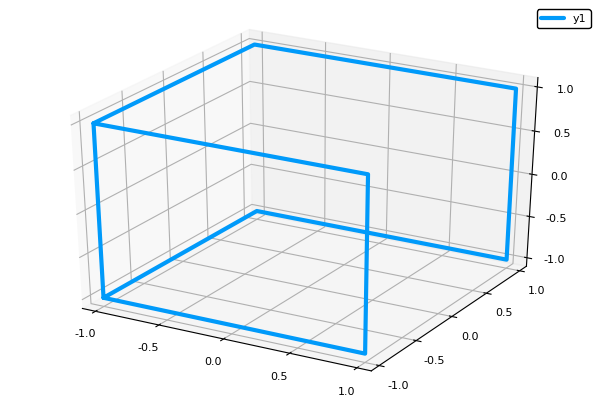

In [5]:
x = [-1 -1 1 1 -1 -1 1 1 -1 -1]; 
y = [-1 -1 -1 -1 -1 1 1 1 1 -1];
z = [1 -1 -1 1 1 1 1 -1 -1 -1]
R = [ x' y' z' ones( length(x) ) ]
plot(x', y', z', w = 3)

In [7]:
R2 = R*Xtr

10×4 Array{Real,2}:
 3.49868  -2.04644   1.89767    1.0
 3.26472  -1.40365   0.0182872  1.0
 5.14411  -0.719608  0.0182872  1.0
 5.37806  -1.3624    1.89767    1.0
 3.49868  -2.04644   1.89767    1.0
 2.85589  -0.280392  2.58171    1.0
 4.73528   0.403649  2.58171    1.0
 4.50132   1.04644   0.702328   1.0
 2.62194   0.362396  0.702328   1.0
 3.26472  -1.40365   0.0182872  1.0

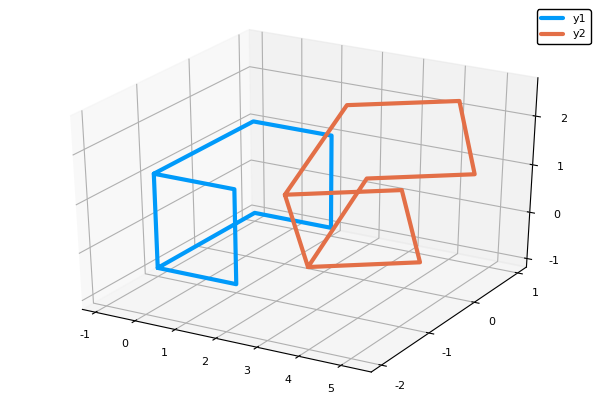

In [8]:
plot!( R2[:,1], R2[:,2], R2[:,3], w = 3)